<a href="https://colab.research.google.com/github/michelDol/mineriaDatos/blob/main/Challenge2_Clustering_PIB_Estados_K5_MichelDolores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Juárez del Estado de Durango**
# **Facultad de Ciencias Exactas**

## **Maestría en Estadística Aplicada**

## *Clustering de PIB por Estado (México) usando todos los años (1980–2024)*

### Nombre del Estudiante: Michel Margarita Dolores Avalos

### Fecha:06 de febrero de 2026

### Durango, DGO. 06 de febrero de 2026


## Objetivo
Agrupar **estados de México** en clusters (grupos) con base en su **trayectoria de PIB** usando todos los años disponibles (1980–2024).  
Se utilizará **k-means**, estandarización de variables y métricas para apoyar la selección de **k**.

> Nota: Este notebook evita el uso de PCA para las gráficas; se usan curvas de desempeño, series de tiempo por cluster, mapas de calor y dispersogramas entre años seleccionados.


# Introducción
Agregar texto aqui.

# 0. Ambiente de Trabajo

In [1]:
# ==============================================================================
# 0. Importaciones
# ==============================================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 1. Carga del dataset

In [5]:
# ==============================================================================
# 1. Cargar dataset
# ==============================================================================
#DATA_PATH = Path("/mnt/data/pib_mex.xlsx")  # En Colab: /content/pib_mex.xlsx

#Cargar archivos desde escritorio
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("pib_mex.xlsx")
print("Dimensiones (filas, columnas):", df.shape)
display(df.head())


Saving pib_mex.xlsx to pib_mex.xlsx
Dimensiones (filas, columnas): (32, 46)


,Estado,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aguascalientes,74478.826,82816.058,83133.483,78800.571,82466.825,84980.153,81602.733,84379.078,86482.199,...,294497.175,307395.841,314242.379,327926.307,329358.364,307125.683,315233.120,314602.247,334314.666,328087.965
1,Baja California,400156.971,451676.827,446781.453,406200.113,425488.625,437529.217,402275.154,414361.763,417816.039,...,795080.747,828692.247,863600.649,878816.868,893946.249,839693.340,896313.559,919300.278,947957.519,947677.009
2,Baja California Sur,53015.906,57736.199,58188.199,57232.819,59391.459,60739.522,59879.334,61326.620,62347.413,...,156072.034,163094.648,170784.403,184618.103,177860.750,151931.290,171064.575,178129.824,180788.204,187152.161
3,Campeche,511362.336,560971.276,559721.988,523134.528,546199.162,566378.356,548649.862,570391.173,588026.452,...,700310.741,663239.242,595666.960,564591.056,541962.926,500514.726,489604.295,472680.024,508514.617,473399.457
4,Coahuila de Zaragoza,362298.762,401419.870,400947.441,372296.472,388155.755,399779.403,375949.169,384635.713,387781.177,...,897702.095,901719.484,941581.763,966054.662,953384.334,843597.571,921586.983,935841.223,927968.193,922286.189


# 2. Preparación de variables

In [8]:
# ==============================================================================
# 2. Preparar variables (X) y etiquetas (Estado)
# ==============================================================================
# 2.1. Columnas de años (todas excepto 'Estado')
year_cols = [c for c in df.columns if c != "Estado"]

# 2.2. Ordenar columnas por año (por si vienen desordenadas)
year_cols = sorted(year_cols)

# 2.3. Matriz de variables (solo años)
X_raw = df[year_cols].copy()

# 2.4. Convertir a numérico (seguridad)
X_raw = X_raw.apply(pd.to_numeric, errors="coerce")

# 2.5. Manejo de faltantes: imputar con mediana por año (si existieran)
if X_raw.isna().sum().sum() > 0:
    X_raw = X_raw.fillna(X_raw.median(numeric_only=True))

# 2.6. Estandarizar StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# 2.7. Etiquetas (estados)
states = df["Estado"].astype(str).values

print("X:", X.shape, "| estados:", len(states), "| años:", len(year_cols))


X: (32, 45) | estados: 32 | años: 45


# 3. K-Means

In [9]:
# ==============================================================================
# 3. K-means con k = 5 (OBLIGATORIO)
# ==============================================================================
k = 5

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=100
)

labels = kmeans.fit_predict(X)

results = pd.DataFrame({
    "Estado": states,
    "cluster": labels
}).sort_values(["cluster", "Estado"]).reset_index(drop=True)

display(results)


,Estado,cluster
0,Chiapas,0
1,Guerrero,0
2,Hidalgo,0
3,Michoacan de Ocampo,0
4,Oaxaca,0
5,Queretaro,0
6,San Luis Potosi,0
7,Sinaloa,0
8,Tabasco,0
9,Estado de Mexico,1


# 4. Métricas de Desempeño

In [10]:
# ==============================================================================
# 4. Métrica de desempeño (Silhouette)
# ==============================================================================
sil = silhouette_score(X, labels)
print(f"Silhouette promedio (k={k}): {sil:.4f}")


Silhouette promedio (k=5): 0.4997


# 5. Graficas

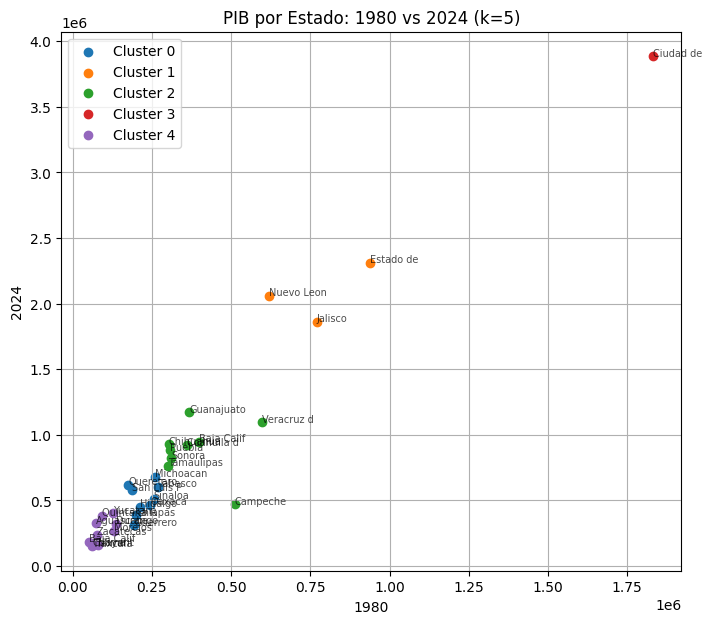

In [11]:
# ==============================================================================
# 5. Gráfica (SOLO UNA): Dispersión 1980 vs 2024 coloreada por cluster
# ==============================================================================
y1, y2 = year_cols[0], year_cols[-1]   # primer y último año

x = df[y1].values
y = df[y2].values

plt.figure(figsize=(8, 7))

for c in sorted(np.unique(labels)):
    mask = (labels == c)
    plt.scatter(x[mask], y[mask], label=f"Cluster {c}")

# (Opcional) Etiquetar puntos con el nombre del estado (puede saturar la figura)
for i, st in enumerate(states):
    plt.text(x[i], y[i], st[:10], fontsize=7, alpha=0.7)

plt.title(f"PIB por Estado: {y1} vs {y2} (k=5)")
plt.xlabel(str(y1))
plt.ylabel(str(y2))
plt.grid(True)
plt.legend()
plt.show()


# 6. Resultados

In [13]:
# # ============================================================================
# 6. Exportar resultados (opcional pero recomendado)
## =============================================================================

out_path = Path("clusters_pib_mex.xlsx")

results.to_excel(out_path, index=False)

print("Exportado:", out_path)

#Descargar el archivo
files.download("clusters_pib_mex.xlsx")


Exportado: clusters_pib_mex.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportado: ___


# 7. Promedio por Cluster

In [16]:
# # ============================================================================
# 7. Promedio PIB para el 2024 por cluster
## =============================================================================
pd.options.display.float_format = '{:,.2f}'.format
print("PIB promedio para 2024 por cluster:")
# Se agrega la columna "cluster" con las etiquetas generadas por KMeans,
# luego se agrupan los estados por cluster,
# se selecciona únicamente el PIB del año 2024
# y finalmente se calcula el promedio del PIB 2024 para cada grupo.
display(df.assign(cluster=labels).groupby("cluster").mean(numeric_only=True)[2024])
pd.options.display.float_format = None

#7.1. En cuál cluster esta Durango?
cluster_durango = results[results['Estado'] == 'Durango']['cluster'].values[0]
print(f"Durango se encuentra en el Cluster {cluster_durango}.")

#7.2. En cuál cluster esta Ciudad de Mexico?
cluster_durango = results[results['Estado'] == 'Ciudad de Mexico']['cluster'].values[0]
print(f"Ciudad de Mexico se encuentra en el Cluster {cluster_durango}.")

PIB promedio para 2024 por cluster:


,2024
cluster,
0,"514,177.73"
1,"2,079,073.02"
2,"889,929.77"
3,"3,885,956.59"
4,"260,507.75"


Durango se encuentra en el Cluster 4.
Ciudad de Mexico se encuentra en el Cluster 3.


In [17]:
# # ============================================================================
# 7. Exportar resultados (opcional pero recomendado)
## =============================================================================

out_path = Path("clusters_pib_mex.xlsx")

results.to_excel(out_path, index=False)

print("Exportado:", out_path)

#Descargar el archivo
files.download("clusters_pib_mex.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportado: clusters_pib_mex.xlsx


# 8. Conclusiones
## Preguntas de reflexión (para entregar)
1. ¿Qué estados quedaron en cada cluster?  
 R.- Por la gráfica podemos observar que en el cluster 1 que tiene un PIB alto se encuentran:
*   Estado de México
*   Nuevo León
*   Jalisco
Mantienen alta posición tanto en 1980 como en 2024.

En el cluster 2 que es un PIB medio alto, son economías relevantes pero no del nivel de los líderes nacionales y los estados que se encuentran son:

*   Guanajuato
*   Veracruz
*   Chihuahua
*   Baja California
*   Tamaulipas
*   Sonora
*   Campeche

En el cluster 3 encontramos un PIB extremadamente alto.

Este cluster está completamente separado del resto. Es un outlier estructural por su tamaño económico y el estado perteneciente es Ciudad de México

Continuamos con el cluster 0 que es un PIB medio, un grupo amplio con economías intermedias y crecimiento estable.
*   Chiapas
*   Guerrero
*   Hidalgo
*   Michoacan de Ocampo
*   Oaxaca
*   Queretaro
*   San Luis Potosi
*   Sinaloa
*   Tabasco

Por ultimo en el cluster 4 estan estados con menor nivel histórico de producción económica y con un PIB bajo
*   Aguascalientes
*   Baja California Sur
*   Colima
*   Durango
*   Morelos
*   Nayarit
*   Quintana Roo
*   Tlaxcala
*   Yucatan
*   Zacatecas


2. ¿Qué patrón observas en la gráfica entre 1980 y 2024?  
La gráfica muestra un patrón muy claro:

*   Existe una relación positiva fuerte entre PIB 1980 y PIB 2024.
*   Los estados que eran grandes en 1980 siguen siendo grandes en 2024.
*   No se observa convergencia fuerte entre estados pequeños y grandes.


3. ¿El silhouette obtenido sugiere clusters bien separados o traslapados?  
Visualmente:

*   Ciudad de México está perfectamente separada → excelente separación.
*   El cluster alto (Edomex, NL, Jalisco) también está claramente diferenciado.
*   Sin embargo, los clusters medio y bajo muestran cierto traslape.